In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns

In [5]:
calendar = pd.read_csv("../../data/raw/calendar.csv")
sales_train_validation = pd.read_csv("../../data/raw/sales_train_validation.csv")
sample_submission = pd.read_csv("../../data/raw/sample_submission.csv")
sell_prices = pd.read_csv("../../data/raw/sell_prices.csv")

# Pomysly

1. Wizualizacja sprzedazy 
    * state-dep
    * store-dep
    * store-dep-cat
    * dep-cat
2. Klastrowanie produktow wzgledem ceny (high/normal/low)
3. Prognoza avg sales prophet poziom store-dep-cat

# Calendar

In [7]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [9]:
calendar.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [8]:
calendar.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [10]:
calendar.shape

(1969, 14)

# Sales_train_validation

In [12]:
sales_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [13]:
sales_train_validation.shape

(30490, 1919)

In [14]:
sales_train_validation.state_id.value_counts()

CA    12196
WI     9147
TX     9147
Name: state_id, dtype: int64

In [19]:
sales_train_validation.store_id.value_counts()

WI_2    3049
CA_2    3049
WI_3    3049
CA_1    3049
TX_1    3049
WI_1    3049
TX_2    3049
CA_4    3049
CA_3    3049
TX_3    3049
Name: store_id, dtype: int64

In [15]:
sales_train_validation.cat_id.value_counts()

FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64

In [17]:
sales_train_validation.dept_id.value_counts()

FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64

In [18]:
sales_train_validation.item_id.value_counts()

HOBBIES_1_244      10
FOODS_3_023        10
FOODS_3_095        10
HOUSEHOLD_1_175    10
FOODS_2_235        10
                   ..
FOODS_1_077        10
HOUSEHOLD_2_381    10
HOUSEHOLD_1_415    10
HOUSEHOLD_2_139    10
FOODS_3_663        10
Name: item_id, Length: 3049, dtype: int64

# Sell_prices

In [70]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [71]:
sell_prices.shape

(6841121, 4)

# Example 1

In [21]:
mask = (sales_train_validation.state_id == 'CA') & \
    (sales_train_validation.store_id == 'CA_1') & \
    (sales_train_validation.cat_id == 'FOODS') & \
    (sales_train_validation.dept_id == 'FOODS_1')
    
    
df = sales_train_validation[mask]    

In [22]:
df.shape

(216, 1919)

In [26]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
1612,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,0,0,1,...,0,2,0,4,1,1,0,1,1,0
1613,FOODS_1_002_CA_1_validation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,0,1,0,1,...,1,3,1,0,0,1,2,0,0,0
1614,FOODS_1_003_CA_1_validation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,0,0,0,0,...,3,0,2,1,1,0,1,0,1,0
1615,FOODS_1_004_CA_1_validation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1616,FOODS_1_005_CA_1_validation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,3,9,3,3,...,3,1,1,2,0,2,2,1,4,1


In [63]:
ts = np.mean(df.iloc[:, 6:], axis=0)

In [64]:
ts = pd.DataFrame({'Sales':ts}).reset_index()

In [65]:
ts = pd.merge(ts, calendar, left_on = 'index', right_on = 'd').loc[:, ('date', 'Sales')]

In [66]:
import datetime as dt

ts['date'] = pd.to_datetime(ts['date'])

C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


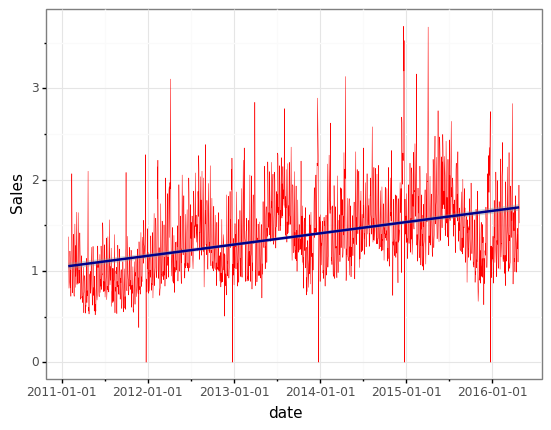

<ggplot: (-9223371886362563829)>

In [67]:
(
    ggplot(data = ts, mapping = aes(x = 'date', y = 'Sales')) 
        + geom_line(color = "red", size = 0.2)
        + geom_smooth(color = "darkblue")
        + theme_bw()
)

In [69]:
len(sales_train_validation.item_id.unique())

3049

In [72]:
for i in sales_train_validation.item_id.unique():
    print(i)

HOBBIES_1_001
HOBBIES_1_002
HOBBIES_1_003
HOBBIES_1_004
HOBBIES_1_005
HOBBIES_1_006
HOBBIES_1_007
HOBBIES_1_008
HOBBIES_1_009
HOBBIES_1_010
HOBBIES_1_011
HOBBIES_1_012
HOBBIES_1_013
HOBBIES_1_014
HOBBIES_1_015
HOBBIES_1_016
HOBBIES_1_017
HOBBIES_1_018
HOBBIES_1_019
HOBBIES_1_020
HOBBIES_1_021
HOBBIES_1_022
HOBBIES_1_023
HOBBIES_1_024
HOBBIES_1_025
HOBBIES_1_026
HOBBIES_1_027
HOBBIES_1_028
HOBBIES_1_029
HOBBIES_1_030
HOBBIES_1_031
HOBBIES_1_032
HOBBIES_1_033
HOBBIES_1_034
HOBBIES_1_035
HOBBIES_1_036
HOBBIES_1_037
HOBBIES_1_038
HOBBIES_1_039
HOBBIES_1_040
HOBBIES_1_041
HOBBIES_1_042
HOBBIES_1_043
HOBBIES_1_044
HOBBIES_1_045
HOBBIES_1_046
HOBBIES_1_047
HOBBIES_1_048
HOBBIES_1_049
HOBBIES_1_050
HOBBIES_1_051
HOBBIES_1_052
HOBBIES_1_053
HOBBIES_1_054
HOBBIES_1_055
HOBBIES_1_056
HOBBIES_1_057
HOBBIES_1_058
HOBBIES_1_060
HOBBIES_1_061
HOBBIES_1_062
HOBBIES_1_063
HOBBIES_1_064
HOBBIES_1_065
HOBBIES_1_066
HOBBIES_1_067
HOBBIES_1_068
HOBBIES_1_069
HOBBIES_1_070
HOBBIES_1_072
HOBBIES_1_073
HOBBIE

FOODS_2_019
FOODS_2_020
FOODS_2_021
FOODS_2_022
FOODS_2_023
FOODS_2_024
FOODS_2_025
FOODS_2_026
FOODS_2_027
FOODS_2_028
FOODS_2_029
FOODS_2_030
FOODS_2_031
FOODS_2_032
FOODS_2_033
FOODS_2_034
FOODS_2_035
FOODS_2_036
FOODS_2_037
FOODS_2_038
FOODS_2_039
FOODS_2_040
FOODS_2_041
FOODS_2_042
FOODS_2_043
FOODS_2_044
FOODS_2_045
FOODS_2_046
FOODS_2_047
FOODS_2_048
FOODS_2_049
FOODS_2_050
FOODS_2_051
FOODS_2_052
FOODS_2_053
FOODS_2_054
FOODS_2_055
FOODS_2_056
FOODS_2_057
FOODS_2_058
FOODS_2_059
FOODS_2_060
FOODS_2_061
FOODS_2_062
FOODS_2_063
FOODS_2_064
FOODS_2_065
FOODS_2_066
FOODS_2_067
FOODS_2_068
FOODS_2_069
FOODS_2_070
FOODS_2_071
FOODS_2_072
FOODS_2_073
FOODS_2_074
FOODS_2_075
FOODS_2_076
FOODS_2_077
FOODS_2_078
FOODS_2_079
FOODS_2_080
FOODS_2_081
FOODS_2_082
FOODS_2_083
FOODS_2_084
FOODS_2_085
FOODS_2_086
FOODS_2_087
FOODS_2_088
FOODS_2_089
FOODS_2_090
FOODS_2_091
FOODS_2_092
FOODS_2_093
FOODS_2_094
FOODS_2_095
FOODS_2_096
FOODS_2_097
FOODS_2_099
FOODS_2_100
FOODS_2_101
FOODS_2_102
FOOD

FOODS_3_622
FOODS_3_623
FOODS_3_624
FOODS_3_625
FOODS_3_626
FOODS_3_627
FOODS_3_628
FOODS_3_629
FOODS_3_630
FOODS_3_631
FOODS_3_632
FOODS_3_633
FOODS_3_634
FOODS_3_635
FOODS_3_636
FOODS_3_637
FOODS_3_638
FOODS_3_639
FOODS_3_640
FOODS_3_641
FOODS_3_642
FOODS_3_643
FOODS_3_644
FOODS_3_645
FOODS_3_646
FOODS_3_647
FOODS_3_648
FOODS_3_649
FOODS_3_650
FOODS_3_651
FOODS_3_652
FOODS_3_653
FOODS_3_654
FOODS_3_655
FOODS_3_656
FOODS_3_657
FOODS_3_658
FOODS_3_659
FOODS_3_660
FOODS_3_661
FOODS_3_662
FOODS_3_663
FOODS_3_664
FOODS_3_665
FOODS_3_666
FOODS_3_667
FOODS_3_668
FOODS_3_669
FOODS_3_670
FOODS_3_671
FOODS_3_672
FOODS_3_673
FOODS_3_674
FOODS_3_675
FOODS_3_676
FOODS_3_677
FOODS_3_678
FOODS_3_679
FOODS_3_680
FOODS_3_681
FOODS_3_682
FOODS_3_683
FOODS_3_684
FOODS_3_685
FOODS_3_686
FOODS_3_687
FOODS_3_688
FOODS_3_689
FOODS_3_690
FOODS_3_691
FOODS_3_692
FOODS_3_693
FOODS_3_694
FOODS_3_695
FOODS_3_696
FOODS_3_697
FOODS_3_698
FOODS_3_700
FOODS_3_701
FOODS_3_702
FOODS_3_703
FOODS_3_704
FOODS_3_705
FOOD